In [1]:
from igraph import *

In [2]:
class Grafo:
    # função que define estrutura do grafo
    def __init__(self, V, E):
        self.V = V
        self.E = set(frozenset((u,v)) for u,v in E)
        self._vizinhos = {}
        
        # adiciona vertice para cada V passado como argumento da classe
        for v in V:
            self.adiciona_vertice(v)

        # adiciona todas arestas em E passado como argumento da classe
        for u,v in self.E:
            self.adiciona_aresta(u,v)
    
    # adicona novo vertice
    def adiciona_vertice(self, v):
        # adiciona se ainda não existe vertive no Grafo
        if v not in self._vizinhos:
            self._vizinhos[v] = set()

    # adiciona nova aresta
    def adiciona_aresta(self, u, v):
        # adiciona vertices caso u ou v não exista
        self.adiciona_vertice(u)
        self.adiciona_vertice(v)

        # adiciona o conjunto de arestas em E
        self.E.add(frozenset([u,v]))
        self._vizinhos[u].add(v)
        self._vizinhos[v].add(u)

    # adiciona aresta direcionada
    def adiciona_aresta_direcionada(self, u, v):
        # adiciona vertices caso u ou v não exista
        self.adiciona_vertice(u)
        self.adiciona_vertice(v)

        # adiciona o conjunto de arestas em E
        self.E.add(frozenset([u,v]))
        self._vizinhos[u].add(v)
    
    # apaga aresta
    def apaga_aresta(self, u, v):
        e = frozenset([u,v]) 

        # verifica se existe conjunto de arestas em E
        if e in self.E:
            self.E.remove(e)
            self._vizinhos[u].remove(v)
            self._vizinhos[v].remove(u)
    
    # Apaga vertice e arestas que ele tinha com outros nós
    def apaga_vertice(self, u):
        para_apagar = list(self.vizinhos(u))
        # apaga todas arestas de u
        for v in para_apagar:
            self.apaga_aresta(u,v)
        del self._vizinhos[u]
    
    # verifica se aresta existe no Grafo
    def existe_aresta(self, u, v):
        e = frozenset([u,v])
        # verifica se conjunto existe em E, caso exista ele retorna True, caso contrario retorna falso
        if e in self.E:
            return True
        else:
            return False

    # retorna grau de um vertice
    def deg(self, v):
        return len(self._vizinhos[v])

    # retorna vizinhos de v
    def vizinhos(self, v):
        return iter(self._vizinhos[v])

    # quantidade de arestas no Grafo
    @property
    def m(self):
        return len(self.E)
    
    @property
    def n(self):
        return len(self._vizinhos)    
    
    def BFS_menor_caminho(self, x, y):
        G_aux = Grafo(self.V, {})
        G_menor = Grafo(self.V, {})
        
        nao_visitado = self.V.copy()
        nao_visitado.remove(x)
        
        queue = []
        queue.append(x)
            
        while(queue):
            u = queue.pop(0)

            for v in list(self.vizinhos(u)):
                if(v in nao_visitado):
                    G_aux.adiciona_aresta_direcionada(v,u)
                    nao_visitado.remove(v)
                    queue.append(v)
                if(v == y):
                    self.menor_caminho(G_aux, G_menor, x, y)
                    return G_menor
                    
                    
        return Grafo(self.V, {})
        
    def menor_caminho(self, G_aux, G_menor, x, y):
        if(y != x):
            G_menor.adiciona_aresta_direcionada(list(G_aux.vizinhos(y))[0],y)
            self.menor_caminho(G_aux, G_menor, x, list(G_aux.vizinhos(y))[0])
    
    
    
    def BFS(self, x):
        G_aux1 = Grafo(self.V, {})
        
        nao_visitado = self.V.copy()
        nao_visitado.remove(x)
        
        queue = []
        queue.append(x)
            
        while(queue):
            u = queue.pop(0)

            for v in list(self.vizinhos(u)):
                if(v in nao_visitado):
                    G_aux1.adiciona_aresta_direcionada(u,v)
                    nao_visitado.remove(v)
                    queue.append(v)
        return G_aux1
    
    def DFS_retorna_ciclo(self):
        # inicializa grafos auxiliares
        G_aux2 = Grafo(self.V,{})

        # lista de vertices não visitados
        nao_visitados = self.V

        # para cada vertice em V não visitado
        for v in self.V:
            if v in nao_visitados:
                self.DFS_visit(G_aux2, v, nao_visitados)

        # retorna grafo com ciclo 
        return G_aux2

    def DFS_visit(self, G_aux2, v,nao_visitados):
        # tira vertice da lista de não visitados
        nao_visitados.remove(v)

        # executa para cada vizinho do vertice v
        for w in list(self.vizinhos(v)):

            # se vertice nao foi visitado então coloca no grafo auxiliar
            if w in nao_visitados:
                G_aux2.adiciona_aresta_direcionada(w,v)
                self.DFS_visit(G_aux2, w,nao_visitados)

In [3]:
print("Digite o tamanho do Grafo:", end=" ")
a = int(input())
nos = []
for i in range(a):
    nos.append(i+1)
    
#inicializando grafo 
G = Grafo(nos, {})

while(1):
    print("para parar de colocar aresta digite 0 ou valor negativo...")
    
    print("Digite arestas 1: ", end="")
    aresta1 = int(input())
    if aresta1 <= 0:
        break
    
    print("Digite aresta 2: ", end="")
    aresta2 = int(input())
    if aresta2 <= 0:
        break
    
    G.adiciona_aresta(aresta1, aresta2)    

Digite o tamanho do Grafo: 5
para parar de colocar aresta digite 0 ou valor negativo...
Digite arestas 1: 1
Digite aresta 2: 2
para parar de colocar aresta digite 0 ou valor negativo...
Digite arestas 1: 2
Digite aresta 2: 3
para parar de colocar aresta digite 0 ou valor negativo...
Digite arestas 1: 1
Digite aresta 2: 3
para parar de colocar aresta digite 0 ou valor negativo...
Digite arestas 1: 3
Digite aresta 2: 4
para parar de colocar aresta digite 0 ou valor negativo...
Digite arestas 1: 4
Digite aresta 2: 5
para parar de colocar aresta digite 0 ou valor negativo...
Digite arestas 1: 5
Digite aresta 2: 3
para parar de colocar aresta digite 0 ou valor negativo...
Digite arestas 1: 0


In [4]:
print("Digite por onde começar a busca em largura: ", end="")
aux1 = int(input())
G1 = G.BFS(aux1) # BFS faz busca em largura a partir do vertice 9

print()
print()


print("Vamos procurar o menor caminho!!!")
print("Digite onde começar: ", end="")
aux2 = int(input())
print()

print("Digite onde terminar: ", end="")
aux3 = int(input())

G2 = G.BFS_menor_caminho(aux2, aux3) # Procura menor caminho do vertice 9 qo 3
G3 = G.DFS_retorna_ciclo() # faz busca em profundidade

Digite por onde começar a busca em largura: 1


Vamos procurar o menor caminho!!!
Digite onde começar: 1

Digite onde terminar: 5


In [5]:
g = Graph(directed = False)
g1 = Graph(directed = False)
g2 = Graph(directed = True)
g3 = Graph(directed = False)

# ------------------------------------------------------------------

lista = []
lista1 = []
lista2 = []
lista3 = []

# ------------------------------------------------------------------

g.add_vertices(range(G.n))
g1.add_vertices(range(G1.n))
g2.add_vertices(range(G2.n))
g3.add_vertices(range(G2.n))

# ------------------------------------------------------------------
for i in range(G.n):
    lista = list(G.vizinhos(i+1))
    for j in lista:
        if ((j-1,i) not in g.get_edgelist()) and ((i,j-1) not in g.get_edgelist()):
            g.add_edges([(i,j-1)])
        
for i in range(G1.n):
    lista1 = list(G1.vizinhos(i+1))
    for j in lista1:
        g1.add_edges([(i,j-1)])

for i in range(G2.n):
    lista2 = list(G2.vizinhos(i+1))
    for j in lista2:
        g2.add_edges([(i,j-1)])
        
for i in range(G3.n):
    lista3 = list(G3.vizinhos(i+1))
    for j in lista3:
        if ((j-1,i) not in g3.get_edgelist()) and ((i,j-1) not in g3.get_edgelist()):
            g3.add_edges([(i,j-1)])
        
# ---------------------------------------------------------------------
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["label"]= str(i+1)
    
for i in range(len(g1.vs)):
    g1.vs[i]["id"]= i
    g1.vs[i]["label"]= str(i+1)    

for i in range(len(g2.vs)):
    g2.vs[i]["id"]= i
    g2.vs[i]["label"]= str(i+1)
    
for i in range(len(g3.vs)):
    g3.vs[i]["id"]= i
    g3.vs[i]["label"]= str(i+1)

Este é o seu grafo!!!


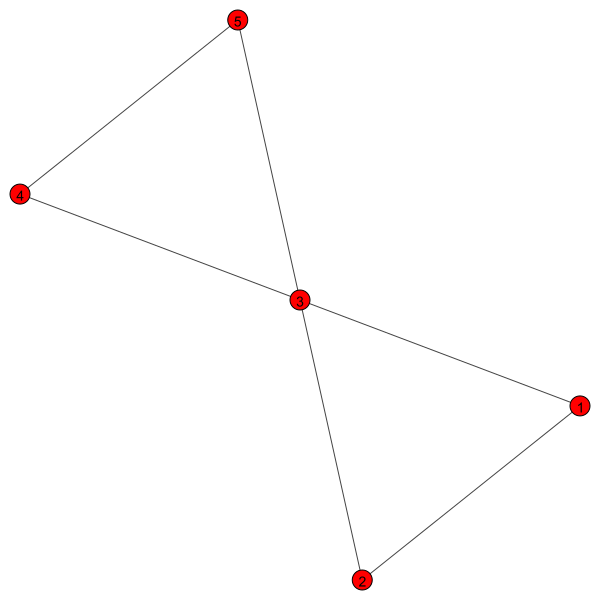

In [6]:
print("Este é o seu grafo!!!")
plot(g)

Este é o resultado da buscar em largura!!!


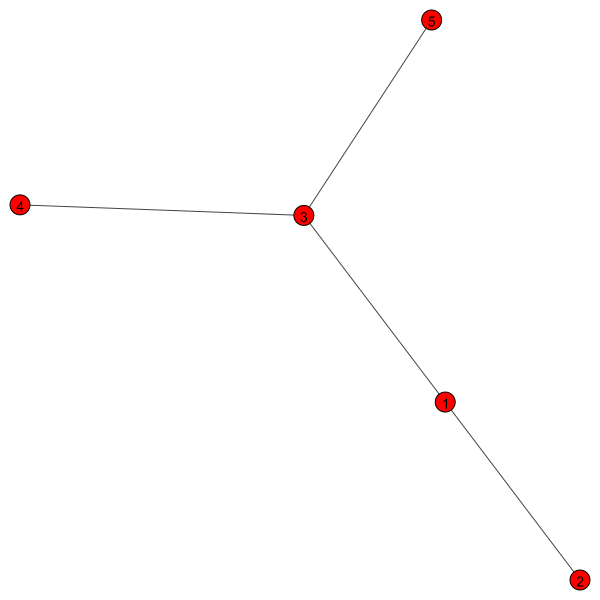

In [7]:
print("Este é o resultado da buscar em largura!!!")
plot(g1)

Este é o menor caminho


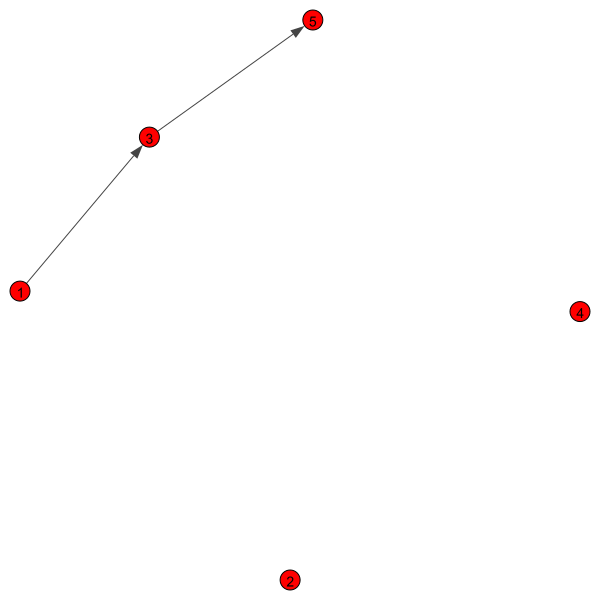

In [8]:
print("Este é o menor caminho")
plot(g2)

Este é o resultado da busca em profundidade


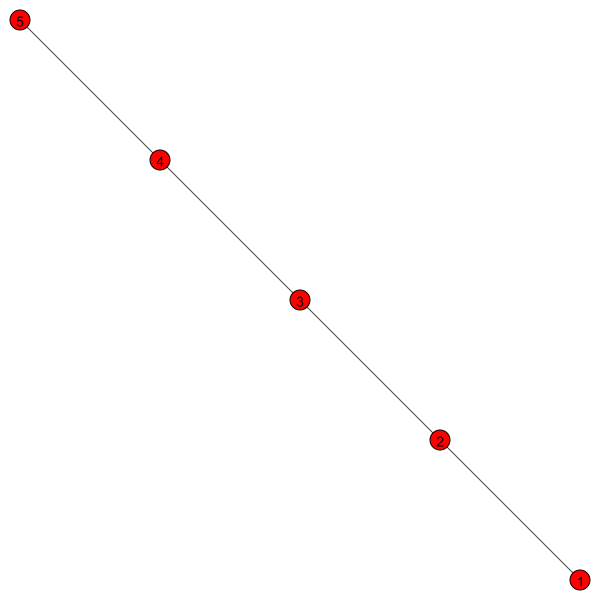

In [9]:
print("Este é o resultado da busca em profundidade")
plot(g3)